In [21]:
include("schedule_lib.jl")
using BenchmarkTools

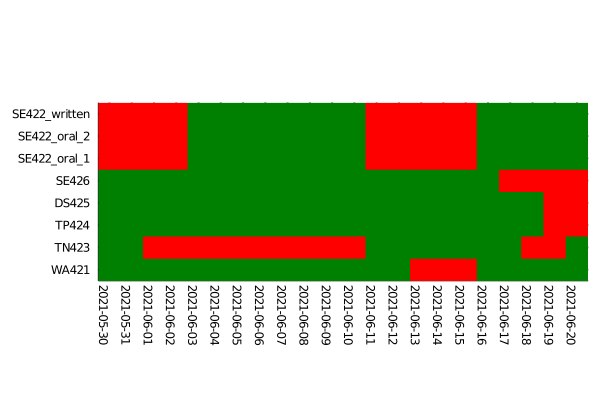

In [22]:
filename = "examparams.xlsx"
s = import_excel(filename)
apply_prep!(s)
s

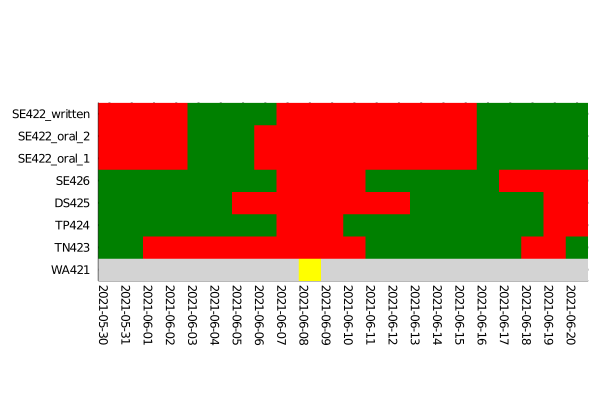

In [23]:
s.courses[1].date = Date(2021,6,8)
s.courses[1]
apply_prep!(s)
s

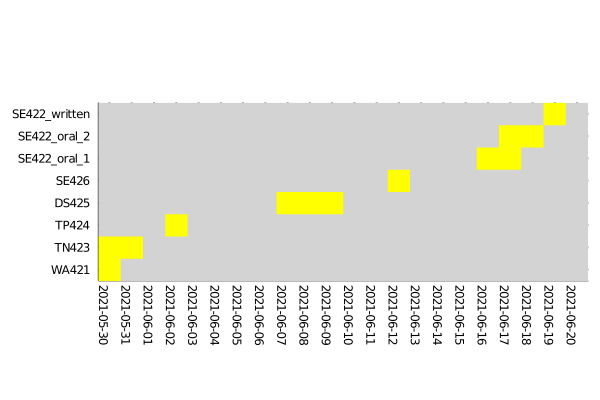

In [24]:
s = import_excel(filename)
s=backtracking_search(s)

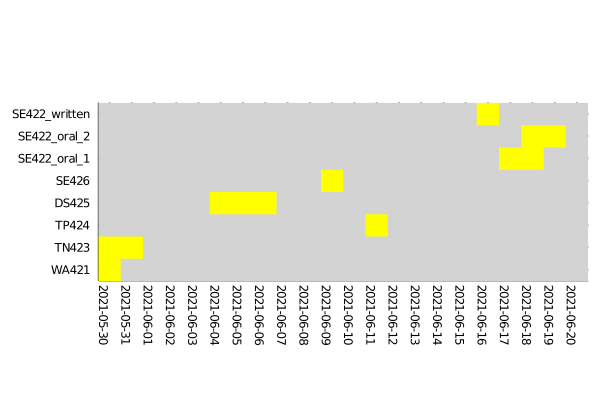

In [25]:
s = import_excel(filename)
s=backtracking_search(s,inference=apply_prep!,select_unassigned_variable=MCV)

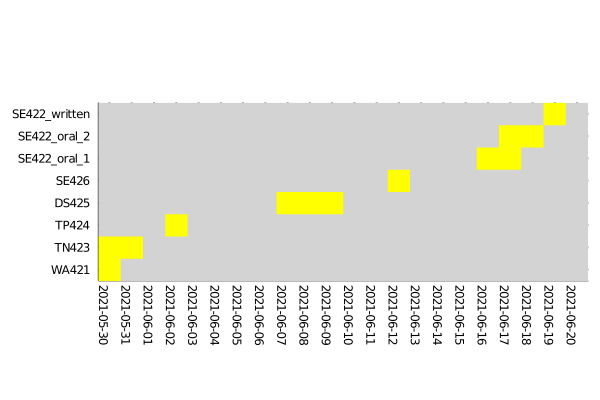

In [26]:
s = import_excel(filename)
s=backtracking_search(s,inference=apply_arc_consistency!)

In [31]:
s = import_excel(filename)
@benchmark backtracking_search($s,inference=$apply_prep!)

BenchmarkTools.Trial: 
  memory estimate:  3.20 MiB
  allocs estimate:  33619
  --------------
  minimum time:     2.022 ms (0.00% GC)
  median time:      2.228 ms (0.00% GC)
  mean time:        2.658 ms (11.49% GC)
  maximum time:     10.897 ms (56.10% GC)
  --------------
  samples:          1879
  evals/sample:     1

In [32]:
s = import_excel(filename)
@benchmark backtracking_search($s,inference=$apply_prep!,select_unassigned_variable=$MCV)

BenchmarkTools.Trial: 
  memory estimate:  75.59 MiB
  allocs estimate:  796942
  --------------
  minimum time:     62.675 ms (6.93% GC)
  median time:      68.664 ms (11.94% GC)
  mean time:        73.044 ms (10.11% GC)
  maximum time:     100.881 ms (10.02% GC)
  --------------
  samples:          69
  evals/sample:     1

In [33]:
s = import_excel(filename)
@benchmark backtracking_search($s,inference=$apply_arc_consistency!)

BenchmarkTools.Trial: 
  memory estimate:  277.80 MiB
  allocs estimate:  2916444
  --------------
  minimum time:     205.134 ms (12.50% GC)
  median time:      213.815 ms (13.25% GC)
  mean time:        222.875 ms (12.62% GC)
  maximum time:     259.782 ms (11.02% GC)
  --------------
  samples:          23
  evals/sample:     1

In [34]:
s = import_excel(filename)
@benchmark backtracking_search($s,inference=$apply_arc_consistency!,select_unassigned_variable=$MCV)

BenchmarkTools.Trial: 
  memory estimate:  660.93 MiB
  allocs estimate:  6967868
  --------------
  minimum time:     491.220 ms (13.12% GC)
  median time:      554.359 ms (11.54% GC)
  mean time:        545.252 ms (11.95% GC)
  maximum time:     594.383 ms (12.09% GC)
  --------------
  samples:          10
  evals/sample:     1